# Assignment 3

This assignment mainly enhances your **Feature Engineering** Skills. The total mark for this assignment is 20. Answer the questions in the code chunk and
fill up the missing part of the code. The tentative due date for this assignment
is 11:59 PM, Wednesday, March 2nd. If I fall behind my schedule, extensions will be given.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from scipy.special import inv_boxcox
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [ ]:
## read the datset from your local drive
from google.colab import files
upload = files.upload()

Saving train (1).csv to train (1).csv


In [ ]:
## upload the dataset
import pandas as pd
df = pd.read_csv('train (1).csv')
df.shape

(1460, 81)

# Feature Engineering

In [ ]:
###### ToDO ##########################################################
### 1 point
# Removing one of the high correlated from pairs checked using heatmap
removeFeats = ['GarageCars', 'GarageYrBlt', 'GrLivArea', 'TotalBsmtSF', 'BedroomAbvGr']
## use .drop() function of pandas dataframe,
## I will need to remove columns, what value should I give for axis?
# MY ANSWER:
# You should give 1 as the axis value to remove columns, it would be 0 if you
# were planning to remove rows.
## do not forget about setting inplace=True
## Fill out the code here
df.drop(removeFeats, axis=1, inplace=True)




In [ ]:
# From EDA, remove numerical features having 1 unique value as occuring more than 99%
toDrop= ['BsmtFinSF2', 'LowQualFinSF', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch','ScreenPorch','PoolArea','MiscVal']
numeric_df = df.select_dtypes(include=['int64', 'float64'])
categorical_df = df.select_dtypes(include=['object'])
numeric_df['BsmtFinSF2'].value_counts(normalize=True, sort=True, ascending=False)[0]

## ToDO###############################################################
## 2 points
######################################################################
for c in toDrop:
    ## fill out the code here
    if float(numeric_df[c].value_counts(normalize=True, sort=True, ascending=False)[0]) >= 0.99:
    ## fill out the code here
        df.drop(c, axis=1, inplace=True)
print(df.columns.shape)

(75,)


In [ ]:
## Check percentage of missing values
# Checking % of null values
for feat in df.columns:
    if df[feat].isnull().any():
        print(feat, ' : ',  round(df[feat].isnull().sum()/df.shape[0], 2)*100)


LotFrontage  :  18.0
Alley  :  94.0
MasVnrType  :  1.0
MasVnrArea  :  1.0
BsmtQual  :  3.0
BsmtCond  :  3.0
BsmtExposure  :  3.0
BsmtFinType1  :  3.0
BsmtFinType2  :  3.0
Electrical  :  0.0
FireplaceQu  :  47.0
GarageType  :  6.0
GarageFinish  :  6.0
GarageQual  :  6.0
GarageCond  :  6.0
PoolQC  :  100.0
Fence  :  81.0
MiscFeature  :  96.0


In [ ]:
# Since MasVnrArea has only 1% data missing, dropping rows with NULL values in MasVnrArea
## ToDO #################################
### 1 points
## fill out the code here

df = df[-df['MasVnrArea'].isnull()]
# Dropping Id column as it does not contribute towards predicting SalePrice
## Once this line has been run, you need to comment out this line of code
df.drop(['Id'], axis=1, inplace=True)

df.shape

(1452, 74)

In [ ]:
print(df['Electrical'].isnull().sum())

## ToDO###########################################################################
## 1 point
# dropping rows with null values in 'Electrical', for very low missing value count
## using dropna function
## fill out the code here

df.dropna(subset=['Electrical'], inplace=True)


1


In [ ]:
# dropping 'PoolQC' for very high percentage of missing value and
## highly imbalance data (if missing value is imputed)
df.drop(['PoolQC'], axis=1, inplace=True)

# Should I remove the MiscFeatures and Alley features
Information:

For 'Alley', Nan means 'No access to alley'

For 'BsmtQual', 'BsmtCond', BsmtExposure, BsmtFinType1, BsmtFinType2 Nan means 'No basement'

For GarageType, GarageFinish, GarageQual, GarageCond Nan means 'No garage'

For 'FireplaceQu' and 'Fence' Nan means 'No Fire place' and 'No fence' respectively

MiscFeature - Nan means no additional features mentioned.

All these features can be imputed by making them into one category in place of missing data.

In [ ]:
# Some categorical features have NAN values which denotes to a particular class.

impute_cat_features = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', \
                       'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish',\
                       'GarageQual', 'GarageCond', 'FireplaceQu' ,'Fence' ,'MiscFeature']
print(df[impute_cat_features].isnull().sum())

## ToDO ###############################################################
## 1 point, fill out the NA values as string 'NA_'+ feature names to make it a category
for feat in impute_cat_features:
    ### fill out the code here
    df[feat].fillna(value="NA+"+feat, inplace=True)





Alley           1361
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
FireplaceQu      685
Fence           1170
MiscFeature     1397
dtype: int64


In [ ]:
### Encoding ordinal categorical features
df['ExterQual'] = df['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['ExterCond'] = df['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['BsmtQual'] = df['BsmtQual'].map({'NA_BsmtQual':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtCond'] = df['BsmtCond'].map({'NA_BsmtCond':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtExposure'] = df['BsmtExposure'].map({'NA_BsmtExposure':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df['BsmtFinType1'] = df['BsmtFinType1'].map({'NA_BsmtFinType1':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['BsmtFinType2'] = df['BsmtFinType2'].map({'NA_BsmtFinType2':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['HeatingQC'] = df['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['KitchenQual'] = df['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['GarageFinish'] = df['GarageFinish'].map({'NA_GarageFinish':0,'Unf':1,'RFn':2,'Fin':3})
df['GarageQual'] = df['GarageQual'].map({'NA_GarageQual':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['GarageCond'] = df['GarageCond'].map({'NA_GarageCond':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['FireplaceQu'] = df['FireplaceQu'].map({'NA_FireplaceQu':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [ ]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NA+Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4.0,3.0,1.0,6.0,706,1.0,0,150,GasA,4,Y,SBrkr,856,854,0,1,0,2,1,1,3,8,Typ,0,NaN,Attchd,2.0,548,3.0,3.0,Y,0,61,0,0,0,NA+Fence,NA+MiscFeature,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NA+Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,2,CBlock,4.0,3.0,4.0,5.0,978,1.0,0,284,GasA,4,Y,SBrkr,1262,0,0,0,1,2,0,1,2,6,Typ,1,3.0,Attchd,2.0,460,3.0,3.0,Y,298,0,0,0,0,NA+Fence,NA+MiscFeature,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NA+Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,3,2,PConc,4.0,3.0,2.0,6.0,486,1.0,0,434,GasA,4,Y,SBrkr,920,866,0,1,0,2,1,1,3,6,Typ,1,3.0,Attchd,2.0,608,3.0,3.0,Y,0,42,0,0,0,NA+Fence,NA+MiscFeature,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NA+Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,2,2,BrkTil,3.0,4.0,1.0,5.0,216,1.0,0,540,GasA,3,Y,SBrkr,961,756,0,1,0,1,0,1,3,7,Typ,1,4.0,Detchd,1.0,642,3.0,3.0,Y,0,35,272,0,0,NA+Fence,NA+MiscFeature,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NA+Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,3,2,PConc,4.0,3.0,3.0,6.0,655,1.0,0,490,GasA,4,Y,SBrkr,1145,1053,0,1,0,2,1,1,3,9,Typ,1,3.0,Attchd,2.0,836,3.0,3.0,Y,192,84,0,0,0,NA+Fence,NA+MiscFeature,0,12,2008,WD,Normal,250000


In [ ]:
df.shape

(1451, 73)

In [ ]:
### One hot encoding on nominal features
unordered_features = ['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2',
                      'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
                      'Electrical', 'GarageType','PavedDrive', 'Fence', 'MiscFeature', 'SaleType','SaleCondition','LotShape',
                      'Utilities', 'LandSlope', 'HouseStyle', 'CentralAir', 'Functional']

##################################################################################
#### ToDO ########################################################################
## use pd.get_dummies to apply one hot encoding on nomial features and set
## drop_first to True, name the new dataframe as dummy_df
## 1 point
### fill out the code here

dummy_df = pd.get_dummies(df[unordered_features],drop_first=True)



In [ ]:
dummy_df.shape

(1451, 164)

In [ ]:
# Dropping those classes which are present less than/equal to 1% of the observations.
dummy_cols_drop = []
for feat in dummy_df.columns:
    if dummy_df[feat].value_counts()[0]/dummy_df.shape[0] >= 0.98:
        dummy_cols_drop.append(feat)
    elif dummy_df[feat].value_counts()[1]/dummy_df.shape[0] >= 0.98:
        dummy_cols_drop.append(feat)

print(dummy_cols_drop)
print(len(dummy_cols_drop))

['MSZoning_RH', 'Street_Pave', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_MeadowV', 'Neighborhood_NPkVill', 'Neighborhood_SWISU', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_WdShing', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_ImStucc', 'Exterior2nd_Other', 'Exterior2nd_Stone', 'Exteri

In [ ]:
## drop these classes
dummy_df.drop(columns = dummy_cols_drop, axis = 1, inplace = True)
dummy_df.shape

(1451, 82)

In [ ]:
###### To do #########################################
### 1 point
# Appending the dummy variables to the original dataframe
## fill out the code here

df = pd.concat([df, dummy_df], axis=1)

# Dropping the redundant columns
df = df.drop(unordered_features,axis=1)


In [ ]:
## Obtain the feature matrix
X = df.drop('SalePrice', axis = 1)

In [ ]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,...,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Heating_GasA,Electrical_SBrkr,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_NA+GarageType,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_NA+Fence,MiscFeature_NA+MiscFeature,MiscFeature_Shed,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial,LotShape_IR2,LotShape_Reg,LandSlope_Mod,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,CentralAir_Y,Functional_Min1,Functional_Min2,Functional_Typ
0,60,65.0,8450,7,5,2003,2003,196.0,3,2,4.0,3.0,1.0,6.0,706,1.0,0,150,4,856,854,0,1,0,2,1,1,3,8,0,NaN,2.0,548,3.0,3.0,0,61,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,1,1,1,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1
1,20,80.0,9600,6,8,1976,1976,0.0,2,2,4.0,3.0,4.0,5.0,978,1.0,0,284,4,1262,0,0,0,1,2,0,1,2,6,1,3.0,2.0,460,3.0,3.0,298,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,1,0,1,1,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1
2,60,68.0,11250,7,5,2001,2002,162.0,3,2,4.0,3.0,2.0,6.0,486,1.0,0,434,4,920,866,0,1,0,2,1,1,3,6,1,3.0,2.0,608,3.0,3.0,0,42,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,1,1,1,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1
3,70,60.0,9550,7,5,1915,1970,0.0,2,2,3.0,4.0,1.0,5.0,216,1.0,0,540,3,961,756,0,1,0,1,0,1,3,7,1,4.0,1.0,642,3.0,3.0,0,35,272,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
4,60,84.0,14260,8,5,2000,2000,350.0,3,2,4.0,3.0,3.0,6.0,655,1.0,0,490,4,1145,1053,0,1,0,2,1,1,3,9,1,3.0,2.0,836,3.0,3.0,192,84,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,1,1,1,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1


In [ ]:
y = df['SalePrice']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

1.8831110462405252


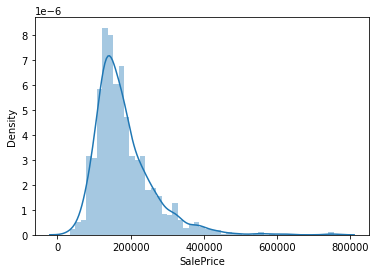

In [ ]:
## Check if y is a skewed distribution
sns.distplot(y)
print(y.skew())

In [ ]:
### ToDO ###############################################
## 1 point
### log transformation to remove skewness
## fill out the code here

y_bc = np.log(y)



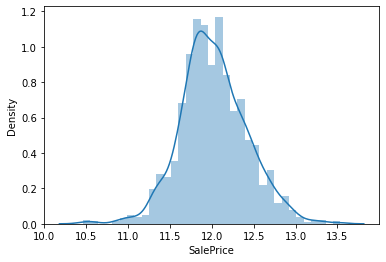

In [ ]:
### draw the histogram of y after the log transformation
sns.distplot(y_bc)

In [ ]:
from sklearn.model_selection import train_test_split
### ToDO################################################################################
## 2 points
## split X, y_bc into training and testing sets with training proportion as 0.8
## set random_state=100
## fill out the code here
X_train, X_test, y_train, y_test = train_test_split(X, y_bc, test_size=0.2, shuffle=True, random_state=100)



In [ ]:
X_train.shape

(1160, 125)

In [ ]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,...,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Heating_GasA,Electrical_SBrkr,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_NA+GarageType,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_NA+Fence,MiscFeature_NA+MiscFeature,MiscFeature_Shed,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial,LotShape_IR2,LotShape_Reg,LandSlope_Mod,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,CentralAir_Y,Functional_Min1,Functional_Min2,Functional_Typ
624,60,80.0,10400,6,5,1972,1972,288.0,2,2,3.0,3.0,1.0,3.0,247,1.0,0,485,3,1012,778,0,1,0,1,2,1,2,8,1,3.0,2.0,484,3.0,3.0,148,0,0,0,147,...,0,0,0,0,1,0,0,0,1,0,1,0,1,1,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0
592,20,60.0,6600,5,8,1982,2003,0.0,2,3,3.0,4.0,1.0,6.0,816,1.0,0,0,4,816,0,0,1,0,1,0,1,2,4,0,NaN,3.0,816,3.0,3.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1
48,190,33.0,4456,4,5,1920,2008,0.0,2,2,3.0,3.0,1.0,1.0,0,1.0,0,736,3,736,716,0,0,0,2,0,3,2,8,0,NaN,NaN,0,NaN,NaN,0,0,102,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1
1070,20,72.0,10152,5,5,1956,1956,120.0,2,2,3.0,3.0,1.0,4.0,586,1.0,0,462,2,1048,0,0,1,0,1,0,1,2,6,0,NaN,1.0,286,3.0,3.0,0,20,0,0,192,...,0,0,1,0,0,0,0,1,0,0,1,0,1,1,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1
1234,70,55.0,8525,5,6,1911,1950,0.0,2,2,3.0,3.0,3.0,1.0,0,1.0,0,940,2,1024,940,0,0,0,1,1,1,2,7,0,NaN,NaN,0,NaN,NaN,0,192,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1


In [ ]:
#### Outlier treatment
#### Checking percentage of outliers in each continuous numeric feature
outliers_percentage={}
numeric_df = X_train.select_dtypes(include=['int64', 'float64'])
cols = ['SalePrice','YearBuilt','OverallCond', 'OverallQual', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath',
           'FullBath', 'MoSold', 'Yrsold', 'BsmtQual', 'ExterCond','BsmtExposure', 'BsmtFinType2','BsmtCond',
            'TotRmsAbvGrd','GarageCond','GarageQual', 'KitchenAbvGr', 'LowQualFinSF','Fireplaces']
for feature in numeric_df.columns:
    if feature not in cols:
        IQR=numeric_df[feature].quantile(.75)-numeric_df[feature].quantile(.25)
        outliers_count=numeric_df[(numeric_df[feature]>(numeric_df[feature].quantile(.75)+1.5*IQR)) | (numeric_df[feature]<(numeric_df[feature].quantile(.25)-1.5*IQR))].shape[0]
        outliers_percentage[feature]=round(outliers_count/numeric_df.shape[0]*100,2)

outlier_df=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

,Features,Percentage
19,EnclosedPorch,14.48
8,BsmtFinSF2,11.47
21,ScreenPorch,8.19
0,MSSubClass,7.16
4,MasVnrArea,6.55
1,LotFrontage,5.78
18,OpenPorchSF,5.34
2,LotArea,4.74
22,MiscVal,3.88
17,WoodDeckSF,1.81


In [ ]:
################################################################################
#### ToDO ######################################################################
### A total of  5 points
# Outlier Treatment
for feature, percent in outliers_percentage.items():
    if percent > 0:
        ### find the IQR of each feature (1 point)
        IQR = X_train[feature].quantile(0.75)-X_train[feature].quantile(0.25)

        ### find the maximum upper fence point of a box plot, which is
        ### the 75% quantile + 1.5*IQR (1 point)
        max_value = X_train[feature].quantile(0.75)+1.5*IQR

        ### find the minimum upper fence point of a box plot, which is
        ### the 75% quantile - 1.5*IQR (1 point)
        min_value = X_train[feature].quantile(0.25)-1.5*IQR


        ## replace all the observations of feature that is larger than
        ## max_value with max_value in both training set and testing set (1 point)
        X_train[feature][X_train[feature]>max_value] = max_value

        X_test[feature][X_test[feature]>max_value] = max_value

        ## replace all the observations of feature that is larger than
        ## min_value with min_value in both training set and testing set (1 point)
        X_train[feature][X_train[feature]>min_value] = min_value

        X_test[feature][X_test[feature]>min_value] = min_value

        print(feature, IQR, min_value, max_value)

MSSubClass 50.0 -55.0 145.0
LotFrontage 21.0 27.5 111.5
LotArea 4088.0 1368.0 17720.0
MasVnrArea 169.0 -253.5 422.5
BsmtFinSF1 705.25 -1057.875 1763.125
BsmtFinSF2 0.0 0.0 0.0
BsmtUnfSF 589.5 -657.75 1700.25
1stFlrSF 509.0 118.5 2154.5
2ndFlrSF 729.25 -1093.875 1823.125
FireplaceQu 1.0 1.5 5.5
GarageArea 240.0 -24.0 936.0
WoodDeckSF 168.0 -252.0 420.0
OpenPorchSF 70.0 -105.0 175.0
EnclosedPorch 0.0 0.0 0.0
3SsnPorch 0.0 0.0 0.0
ScreenPorch 0.0 0.0 0.0
MiscVal 0.0 0.0 0.0


# Remark
Many features have outliers

Dropping all the outliers will cause loss of information.

Hence reassigning fixed minimum and maximum values to those rows where feature value is outside the range of [25th percentile - 1.5 IQR, 75th percentile + 1.5 IQR]
IQR or Inter Quartile Range = Difference between 75th percentile and 25th percentile values of a feature.

Target column 'SalePrice' is excluded in this since this is our target variable(Important point)!

Some other features are also excluded since those are ordered categorical type which are labelled encoded to numeric form.

In [ ]:
#  Checking Null values
## python function check NULL values for each column of a data frame
def null_values(dataf):
    for feat in dataf.columns:
        if dataf[feat].isnull().any():
            print(feat+" : "+str(dataf[feat].isnull().sum()))
### ToDO ######################################################################
### 1 point, asnwer this question

## What is the meaning of this line str(dataf[feat].isnull().sum()) (1 point)

# MY ANSWER:
# The meaning of that line of code means that it will sum, so add up,
#  all of the nulls for the current feature


In [ ]:
##### ToDO ######################################
### 1 point
### Apply null_values function to X_train and X_test
### shows how many are missing from each feature
null_values(X_train)
print("-----------")
null_values(X_test)

LotFrontage : 204
BsmtQual : 25
BsmtCond : 25
BsmtExposure : 26
BsmtFinType1 : 25
BsmtFinType2 : 26
FireplaceQu : 551
GarageFinish : 67
GarageQual : 67
GarageCond : 67
-----------
LotFrontage : 53
BsmtQual : 12
BsmtCond : 12
BsmtExposure : 12
BsmtFinType1 : 12
BsmtFinType2 : 12
FireplaceQu : 134
GarageFinish : 14
GarageQual : 14
GarageCond : 14


In [ ]:
X_train['LotFrontage'].dtype

dtype('float64')

In [ ]:
# Missing value imputation
## Imputing missing values with mean (can also use median) of train data since outliers are already removed.
imputed_value = np.mean(X_train['LotFrontage'])
print("Mean : ",imputed_value)
### Replace the missing values with the mean of the training data in both
##################################################################
### training set and testing set

### use fillna() function and what value should you assign to 'inplace' argument?

# MY ANSWER:
# The value that you should use to assign to 'inplace' argument is True because
# this will make the code before that which you are using to change the data set
# stay forever and you won't have to keep running it to make it stay

X_train['LotFrontage'].fillna(imputed_value, inplace = True)
X_test['LotFrontage'].fillna(imputed_value, inplace = True)

Mean :  27.323221757322177


In [ ]:
X_train.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,...,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Heating_GasA,Electrical_SBrkr,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_NA+GarageType,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_NA+Fence,MiscFeature_NA+MiscFeature,MiscFeature_Shed,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial,LotShape_IR2,LotShape_Reg,LandSlope_Mod,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,CentralAir_Y,Functional_Min1,Functional_Min2,Functional_Typ
624,-55,27.5,1368,6,5,1972,1972,-253.5,2,2,3.0,3.0,1.0,3.0,-1057.875,1.0,0,-657.75,3,118.5,-1093.875,0,1,0,1,2,1,2,8,1,1.5,2.0,-24,3.0,3.0,-252,-105,0,0,0,...,0,0,0,0,1,0,0,0,1,0,1,0,1,1,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0
592,-55,27.5,1368,5,8,1982,2003,-253.5,2,3,3.0,4.0,1.0,6.0,-1057.875,1.0,0,-657.75,4,118.5,-1093.875,0,1,0,1,0,1,2,4,0,NaN,3.0,-24,3.0,3.0,-252,-105,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1
48,-55,27.5,1368,4,5,1920,2008,-253.5,2,2,3.0,3.0,1.0,1.0,-1057.875,1.0,0,-657.75,3,118.5,-1093.875,0,0,0,2,0,3,2,8,0,NaN,NaN,-24,NaN,NaN,-252,-105,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1
1070,-55,27.5,1368,5,5,1956,1956,-253.5,2,2,3.0,3.0,1.0,4.0,-1057.875,1.0,0,-657.75,2,118.5,-1093.875,0,1,0,1,0,1,2,6,0,NaN,1.0,-24,3.0,3.0,-252,-105,0,0,0,...,0,0,1,0,0,0,0,1,0,0,1,0,1,1,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1
1234,-55,27.5,1368,5,6,1911,1950,-253.5,2,2,3.0,3.0,3.0,1.0,-1057.875,1.0,0,-657.75,2,118.5,-1093.875,0,0,0,1,1,1,2,7,0,NaN,NaN,-24,NaN,NaN,-252,-105,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1


In [ ]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,...,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Heating_GasA,Electrical_SBrkr,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_NA+GarageType,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_NA+Fence,MiscFeature_NA+MiscFeature,MiscFeature_Shed,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial,LotShape_IR2,LotShape_Reg,LandSlope_Mod,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,CentralAir_Y,Functional_Min1,Functional_Min2,Functional_Typ
357,-55,27.500000,1368,5,5,1976,1976,-253.5,2,2,4.0,3.0,1.0,5.0,-1057.875,1.0,0,-657.75,2,118.5,-1093.875,0,1,0,1,1,1,2,6,1,1.0,3.0,-24,3.0,3.0,-252,-105,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1
824,-55,27.500000,1368,8,5,2006,2006,-253.5,3,2,4.0,4.0,1.0,1.0,-1057.875,1.0,0,-657.75,4,118.5,-1093.875,0,0,0,2,0,1,3,7,1,1.5,2.0,-24,3.0,3.0,-252,-105,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1
369,-55,27.323222,1368,5,7,1959,2006,-253.5,2,3,3.0,3.0,1.0,5.0,-1057.875,3.0,0,-657.75,4,118.5,-1093.875,0,1,0,1,0,1,3,7,1,1.5,3.0,-24,3.0,3.0,-252,-105,0,0,0,...,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1
291,-55,27.500000,1368,5,6,1912,2000,-253.5,2,1,3.0,2.0,1.0,3.0,-1057.875,1.0,0,-657.75,4,118.5,-1093.875,0,1,0,2,0,1,1,9,0,NaN,NaN,-24,NaN,NaN,-252,-105,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1
134,-55,27.500000,1368,5,6,1968,1993,-253.5,2,2,3.0,3.0,1.0,3.0,-1057.875,1.0,0,-657.75,3,118.5,-1093.875,0,0,0,2,1,1,2,7,1,1.5,2.0,-24,3.0,3.0,-252,-105,0,0,0,...,0,0,0,1,0,0,0,0,1,0,1,0,1,1,1,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0


In [ ]:
#### Last step ##########################################
### scaling the features
sscaler = StandardScaler()

###############################################################
#### ToDO #####################################################
## check the documentation of this StandardScaler() class
## https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
### 1 point

## What does fit() function do?

# MY ANSWER:
# The fit() funtion standardizes the data set, and also finds the mean and
# the standard deviation of each feature

sscaler.fit(X_train)
## 1 point

## what does transform() function do?

# MY ANSWER:
# The transform() function transforms the data set, in this case we are
# changing it into a pandas data frame so that it is easier to use

X_train_sc = pd.DataFrame(data=sscaler.transform(X_train), columns=X_train.columns)
X_test_sc = pd.DataFrame(data=sscaler.transform(X_test), columns=X_test.columns)

In [ ]:
X_train_sc.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,...,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Heating_GasA,Electrical_SBrkr,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_NA+GarageType,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_NA+Fence,MiscFeature_NA+MiscFeature,MiscFeature_Shed,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial,LotShape_IR2,LotShape_Reg,LandSlope_Mod,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,CentralAir_Y,Functional_Min1,Functional_Min2,Functional_Typ
0,0.0,0.197206,0.029374,-0.087362,-0.534765,0.020058,-0.637763,0.0,-0.687959,-0.259461,-0.875073,-0.047789,-0.642915,-0.316877,0.0,-0.316807,0.0,0.0,-0.146713,0.0,0.0,-0.12551,1.106429,-0.237749,-1.036937,3.254593,-0.204629,-0.783421,0.919723,0.603313,0.147689,0.244976,0.0,0.099174,0.117632,0.0,0.0,0.0,0.0,0.0,...,-0.210011,-0.410094,-0.418663,-0.330131,1.370552,-0.379453,-0.165704,-0.669470,0.831241,-0.308825,1.140871,-0.899818,0.154371,0.296951,0.823849,-0.247587,-0.599922,-0.247587,-0.13904,0.290021,-0.191415,-0.355266,0.494606,0.205495,-0.196204,-0.291764,0.385376,0.457814,-0.295229,-0.171118,0.761828,-0.212238,-0.988003,1.502806,-0.16843,-0.212238,0.261036,-0.135784,7.364652,-4.071334
1,0.0,0.197206,0.029374,-0.816429,2.210046,0.352440,0.882552,0.0,-0.687959,2.662621,-0.875073,3.568254,-0.642915,1.137256,0.0,-0.316807,0.0,0.0,0.897379,0.0,0.0,-0.12551,1.106429,-0.237749,-1.036937,-0.763851,-0.204629,-0.783421,-1.521647,-0.945012,NaN,1.490366,0.0,0.099174,0.117632,0.0,0.0,0.0,0.0,0.0,...,-0.210011,2.438464,-0.418663,-0.330131,-0.729633,-0.379453,-0.165704,-0.669470,0.831241,-0.308825,-0.876523,1.111336,0.154371,0.296951,-1.213815,-0.247587,1.666884,-0.247587,-0.13904,0.290021,-0.191415,-0.355266,0.494606,0.205495,-0.196204,-0.291764,0.385376,0.457814,-0.295229,-0.171118,0.761828,-0.212238,1.012143,-0.665422,-0.16843,-0.212238,0.261036,-0.135784,-0.135784,0.245620
2,0.0,0.197206,0.029374,-1.545496,-0.534765,-1.708331,1.127764,0.0,-0.687959,-0.259461,-0.875073,-0.047789,-0.642915,-1.286299,0.0,-0.316807,0.0,0.0,-0.146713,0.0,0.0,-0.12551,-0.812043,-0.237749,0.796671,-0.763851,8.924985,-0.783421,0.919723,-0.945012,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,-0.210011,-0.410094,2.388557,-0.330131,-0.729633,-0.379453,-0.165704,-0.669470,0.831241,-0.308825,-0.876523,-0.899818,0.154371,0.296951,-1.213815,-0.247587,-0.599922,4.038989,-0.13904,-3.448027,-0.191415,-0.355266,0.494606,0.205495,-0.196204,3.427427,-2.594867,-2.184295,3.387199,-0.171118,0.761828,-0.212238,-0.988003,1.502806,-0.16843,-0.212238,0.261036,-0.135784,-0.135784,0.245620
3,0.0,0.197206,0.029374,-0.816429,-0.534765,-0.511754,-1.422441,0.0,-0.687959,-0.259461,-0.875073,-0.047789,-0.642915,0.167834,0.0,-0.316807,0.0,0.0,-1.190805,0.0,0.0,-0.12551,1.106429,-0.237749,-1.036937,-0.763851,-0.204629,-0.783421,-0.300962,-0.945012,NaN,-1.000414,0.0,0.099174,0.117632,0.0,0.0,0.0,0.0,0.0,...,-0.210011,-0.410094,2.388557,-0.330131,-0.729633,-0.379453,-0.165704,1.493719,-1.203020,-0.308825,1.140871,-0.899818,0.154371,0.296951,0.823849,-0.247587,-0.599922,-0.247587,-0.13904,0.290021,-0.191415,-0.355266,0.494606,0.205495,-0.196204,-0.291764,0.385376,0.457814,-0.295229,-0.171118,0.761828,-0.212238,1.012143,-0.665422,-0.16843,-0.212238,0.261036,-0.135784,-0.135784,0.245620
4,0.0,0.197206,0.029374,-0.816429,0.380172,-2.007476,-1.716695,0.0,-0.687959,-0.259461,-0.875

In [ ]:
X_test_sc.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,...,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Heating_GasA,Electrical_SBrkr,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_NA+GarageType,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_NA+Fence,MiscFeature_NA+MiscFeature,MiscFeature_Shed,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial,LotShape_IR2,LotShape_Reg,LandSlope_Mod,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,CentralAir_Y,Functional_Min1,Functional_Min2,Functional_Typ
0,0.0,0.197206,0.029374,-0.816429,-0.534765,0.153011,-0.441593,0.0,-0.687959,-0.259461,0.607327,-0.047789,-0.642915,0.652545,0.0,-0.316807,0.0,0.0,-1.190805,0.0,0.0,-0.12551,1.106429,-0.237749,-1.036937,1.245371,-0.204629,-0.783421,-0.300962,0.603313,-6.770979,1.490366,0.0,0.099174,0.117632,0.0,0.0,0.0,0.0,0.0,...,4.761667,-0.410094,-0.418663,-0.330131,-0.729633,-0.379453,-0.165704,-0.66947,0.831241,-0.308825,-0.876523,1.111336,0.154371,0.296951,0.823849,-0.247587,-0.599922,-0.247587,-0.13904,0.290021,-0.191415,2.814796,-2.021811,0.205495,-0.196204,-0.291764,0.385376,0.457814,-0.295229,-0.171118,0.761828,-0.212238,1.012143,-0.665422,-0.16843,-0.212238,0.261036,-0.135784,-0.135784,0.245620
1,0.0,0.197206,0.029374,1.370772,-0.534765,1.150158,1.029679,0.0,1.062112,-0.259461,0.607327,3.568254,-0.642915,-1.286299,0.0,-0.316807,0.0,0.0,0.897379,0.0,0.0,-0.12551,-0.812043,-0.237749,0.796671,-0.763851,-0.204629,0.731193,0.309380,0.603313,0.147689,0.244976,0.0,0.099174,0.117632,0.0,0.0,0.0,0.0,0.0,...,-0.210011,-0.410094,-0.418663,-0.330131,1.370552,-0.379453,-0.165704,-0.66947,0.831241,-0.308825,-0.876523,1.111336,0.154371,0.296951,0.823849,-0.247587,-0.599922,-0.247587,-0.13904,0.290021,-0.191415,-0.355266,0.494606,0.205495,-0.196204,3.427427,-2.594867,-2.184295,3.387199,-0.171118,0.761828,-0.212238,1.012143,-0.665422,-0.16843,-0.212238,0.261036,-0.135784,-0.135784,0.245620
2,0.0,0.000000,0.029374,-0.816429,1.295109,-0.412040,1.029679,0.0,-0.687959,2.662621,-0.875073,-0.047789,-0.642915,0.652545,0.0,1.928562,0.0,0.0,0.897379,0.0,0.0,-0.12551,1.106429,-0.237749,-1.036937,-0.763851,-0.204629,0.731193,0.309380,0.603313,0.147689,1.490366,0.0,0.099174,0.117632,0.0,0.0,0.0,0.0,0.0,...,-0.210011,-0.410094,-0.418663,-0.330131,-0.729633,2.635376,-0.165704,-0.66947,0.831241,-0.308825,1.140871,-0.899818,0.154371,0.296951,-1.213815,-0.247587,1.666884,-0.247587,-0.13904,0.290021,-0.191415,-0.355266,0.494606,0.205495,-0.196204,-0.291764,0.385376,0.457814,-0.295229,-0.171118,-1.312633,-0.212238,1.012143,-0.665422,-0.16843,-0.212238,0.261036,-0.135784,-0.135784,0.245620
3,0.0,0.197206,0.029374,-0.816429,0.380172,-1.974237,0.735425,0.0,-0.687959,-3.181542,-0.875073,-3.663833,-0.642915,-0.316877,0.0,-0.316807,0.0,0.0,0.897379,0.0,0.0,-0.12551,1.106429,-0.237749,0.796671,-0.763851,-0.204629,-2.298034,1.530065,-0.945012,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,-0.210011,-0.410094,-0.418663,-0.330131,1.370552,-0.379453,-0.165704,-0.66947,0.831241,-0.308825,-0.876523,1.111336,0.154371,0.296951,-1.213815,-0.247587,-0.599922,4.038989,-0.13904,-3.448027,-0.191415,-0.355266,0.494606,0.205495,-0.196204,-0.291764,0.385376,0.457814,-0.295229,-0.171118,0.761828,-0.212238,-0.988003,1.502806,-0.16843,-0.212238,-3.830884,-0.135784,-0.135784,0.245620
4,0.0,0.197206,0.029374,-0.816429,0.380172,-0.112895,0.392128,0.0,-0.687959,-0.259461,-0.875073,-0.0

In [ ]:
### saved the cleaned datast X_train_sc, X_test_sc, y_train and y_test to
### your local folder
# This saves a pandas dataframe to a local computer
from google.colab import files
X_train_sc.to_csv("X_train_sc.csv")
X_test_sc.to_csv("X_test_sc.csv")
y_train.to_csv("y_train.csv")
y_test.to_csv("y_test.csv")
files.download("X_train_sc.csv")
files.download("X_test_sc.csv")
files.download("y_train.csv")
files.download("y_test.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>